In [ ]:
# A Fashion Recommendation System using Image Features leverages computer vision and machine learning techniques to analyze fashion item's
# visual aspects (like colour, texture, and style) and recommend similar or complementary products to users

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os

zip_file_path = '/content/drive/My Drive/Datasets/women-fashion.zip'
print(os.path.exists(zip_file_path))  # This should return True if the file exists

True


In [25]:
from zipfile import ZipFile

extraction_directory = '/content/drive/My Drive/Datasets/women_fashion/'

if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

['women fashion', '__MACOSX']


In [26]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['white knee-length dress with a fitted design and long sleeves.webp',
  'short, white, sleeveless dress with thin straps.jpg',
  'deep burgundy, silky dress with long sleeves and a wrap-style front.jpg',
  'long, intricately designed dress with full sleeves.jpg',
  'beige top adorned with black dots and a green skirt.jpg',
  'form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg',
  'black top, white trousers.jpg',
  'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg',
  'metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg',
  'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg'],
 97)

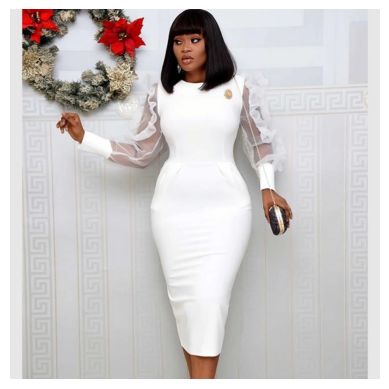

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [40]:
# Create a list of all image file paths that will be used later in extracting the features from every image in the dataset

import glob # The primary purpose of the glob module is to retrieve file paths that match a specified pattern

# directory path containing your images
image_directory = '/content/drive/My Drive/Datasets/women_fashion//women fashion'

# glob.blob() searches for files that match a specified pattern, in this case, *.*, which matches all files within the directory
# The list comprehension then filters these files to include only those with specific image file extensions (.jpg, .png, .jpeg, .webp)
# It ensures that image_paths_list contains paths to only the image files
image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/drive/My Drive/Datasets/women_fashion//women fashion/white knee-length dress with a fitted design and long sleeves.webp', '/content/drive/My Drive/Datasets/women_fashion//women fashion/short, white, sleeveless dress with thin straps.jpg', '/content/drive/My Drive/Datasets/women_fashion//women fashion/deep burgundy, silky dress with long sleeves and a wrap-style front.jpg', '/content/drive/My Drive/Datasets/women_fashion//women fashion/long, intricately designed dress with full sleeves.jpg', '/content/drive/My Drive/Datasets/women_fashion//women fashion/beige top adorned with black dots and a green skirt.jpg', '/content/drive/My Drive/Datasets/women_fashion//women fashion/form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg', '/content/drive/My Drive/Datasets/women_fashion//women fashion/black top, white trousers.jpg', '/content/drive/My Drive/Datasets/women_fashion//women fashion/ark green, knee-length dress with short sleeves and a white, patterned neckl

In [41]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [42]:
# VGG16 model, a popular convolutional neural network pre-trained on the ImageNet dataset, to extract visual features from images stored in image_paths_list

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

In [43]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224)) # Resized to 224×224 pixels to match the VGG16 input size requirements
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

In [44]:
def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

In [45]:
all_features = []
all_image_names = []

In [46]:
for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━

In [49]:
# Function to recommend fashion images based on image features

from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/drive/My Drive/Datasets/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


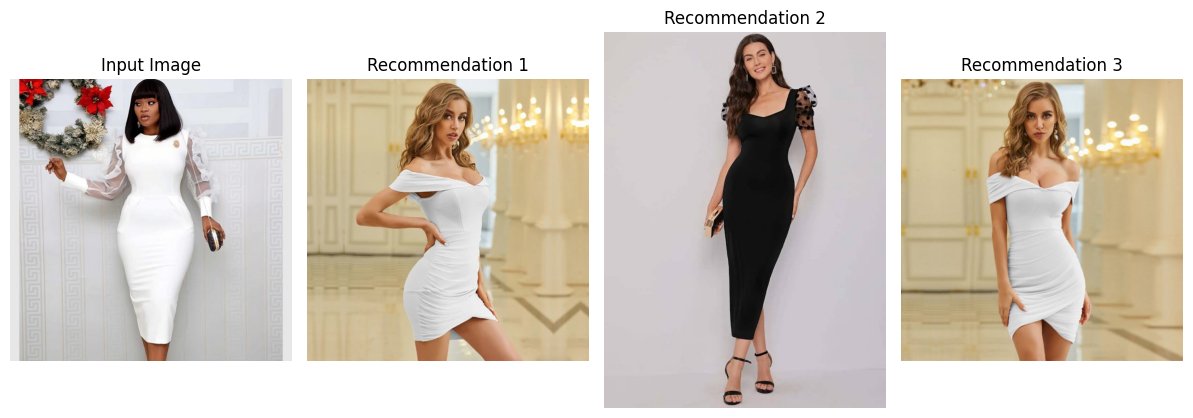

In [50]:
input_image_path = '/content/drive/My Drive/Datasets/women_fashion//women fashion/white knee-length dress with a fitted design and long sleeves.webp'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)